In [1]:
import numpy as np
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("train_and_test2.csv")

In [3]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [4]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [5]:
for col in df.columns:
    print(f"col {col} unique values: {len(df[col].unique())}")

col Passengerid unique values: 1309
col Age unique values: 98
col Fare unique values: 281
col Sex unique values: 2
col sibsp unique values: 7
col zero unique values: 1
col zero.1 unique values: 1
col zero.2 unique values: 1
col zero.3 unique values: 1
col zero.4 unique values: 1
col zero.5 unique values: 1
col zero.6 unique values: 1
col Parch unique values: 8
col zero.7 unique values: 1
col zero.8 unique values: 1
col zero.9 unique values: 1
col zero.10 unique values: 1
col zero.11 unique values: 1
col zero.12 unique values: 1
col zero.13 unique values: 1
col zero.14 unique values: 1
col Pclass unique values: 3
col zero.15 unique values: 1
col zero.16 unique values: 1
col Embarked unique values: 4
col zero.17 unique values: 1
col zero.18 unique values: 1
col 2urvived unique values: 2


In [6]:
dict(df.Parch.value_counts())

{0: 1002, 1: 170, 2: 113, 3: 8, 5: 6, 4: 6, 6: 2, 9: 2}

In [7]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [8]:
for col in df.columns:
    if col.lower().startswith("zero"):
        if len(df[col].unique()):
            df.pop(col)

In [9]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [10]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64

In [11]:
df.rename(columns = {'2urvived': 'Survived'}, inplace=True)

In [12]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [13]:
df.shape

(1309, 9)

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(1307, 9)

In [16]:
df["Age"][(df["Age"] > 35) & (df["Survived"] == 1)]

1      38.0
11     58.0
15     55.0
25     38.0
52     49.0
       ... 
857    51.0
862    48.0
865    42.0
871    47.0
879    56.0
Name: Age, Length: 81, dtype: float64

In [17]:
df["Age"][(df["Age"] > 35) & (df["Survived"] == 0)]

6       54.0
13      39.0
30      40.0
33      66.0
35      42.0
        ... 
1295    43.0
1298    50.0
1302    37.0
1305    39.0
1306    38.5
Name: Age, Length: 239, dtype: float64

In [18]:
import matplotlib.pyplot as plt

def bar_plot(input_dict, y_label, x_label, title):
    fig, ax = plt.subplots(figsize = (7, 4))
    df = pd.DataFrame(input_dict, index=[0]).T # , index=[0]
    df.rename(columns = {0:"Count"}, inplace=True)
    df['Survived'] = ["Sink", "Lived"]
    print(df.head())


    percentage = []
    n_data = sum(list(input_dict.values()))
    for i in range(df.shape[0]):
        pct = (df["Count"][i] / n_data) * 100
        percentage.append(round(pct,2))
    df['Percentage'] = percentage


    p1 = plt.bar(df.Survived, df["Count"], color = ['red', 'yellow'])
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)


    i = 0
    for bar in p1:
        width = bar.get_width()
        height = bar.get_height()
        x, y = bar.get_xy()
        plt.text(x+width/2, y+height*1.01, str(df.Percentage[i])+'%', ha='center', weight='bold')
        i += 1
    plt.show()

In [19]:
dict(df.Survived.value_counts())

{0: 967, 1: 340}

   Count Survived
0    967     Sink
1    340    Lived


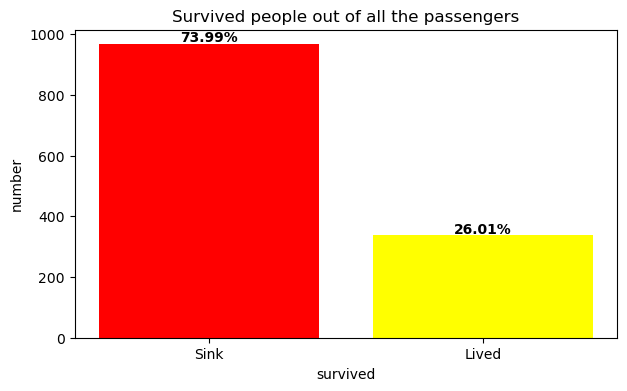

In [20]:
bar_plot(dict(df.Survived.value_counts()), "number", "survived", "Survived people out of all the passengers")

In [21]:
older_35 = {"Sink": len(df["Age"][(df["Age"] > 35) & (df["Survived"] == 0)]), "Lived": len(df["Age"][(df["Age"] > 35) & (df["Survived"] == 1)])}

In [22]:
older_35

{'Sink': 239, 'Lived': 81}

       Count Survived
Sink     239     Sink
Lived     81    Lived


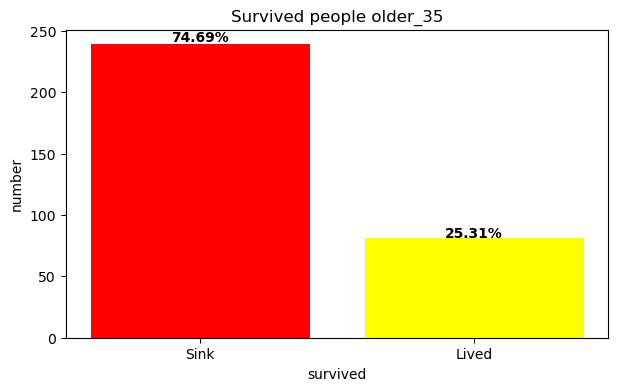

In [23]:
bar_plot(older_35, "number", "survived", "Survived people older_35");

In [24]:
younger_35 = {"Sink": len(df["Age"][(df["Age"] < 35) & (df["Survived"] == 0)]), "Lived": len(df["Age"][(df["Age"] < 35) & (df["Survived"] == 1)])}

In [25]:
younger_35

{'Sink': 716, 'Lived': 248}

       Count Survived
Sink     716     Sink
Lived    248    Lived


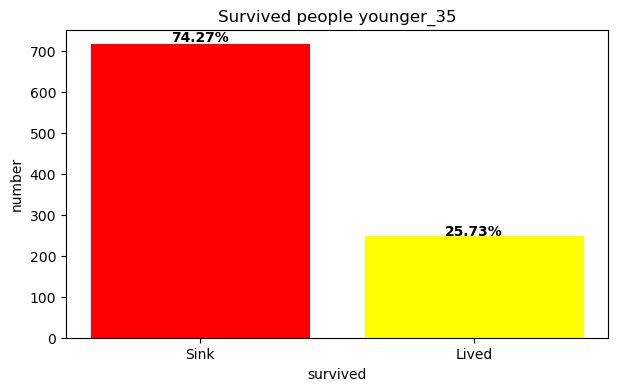

In [26]:
bar_plot(younger_35, "number", "survived", "Survived people younger_35")

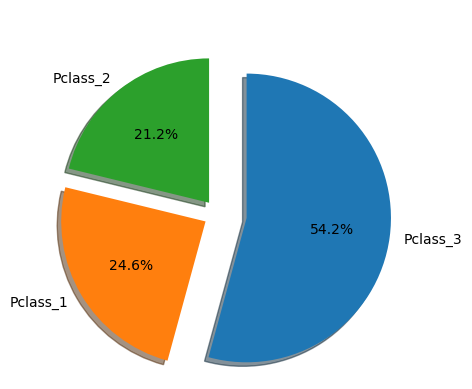

In [27]:
sorted_counts = df.Pclass.value_counts()
ordered_labels = ["Pclass_"+str(cls) for cls in sorted_counts.index]

# declaring exploding pie
explode = [.2, .1, .1]
plt.pie(sorted_counts, labels=ordered_labels, startangle=90,
        counterclock=False, explode=explode, autopct='%.1f%%', shadow = True);
plt.axis('square');

In [28]:
df.Parch.value_counts()

0    1000
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

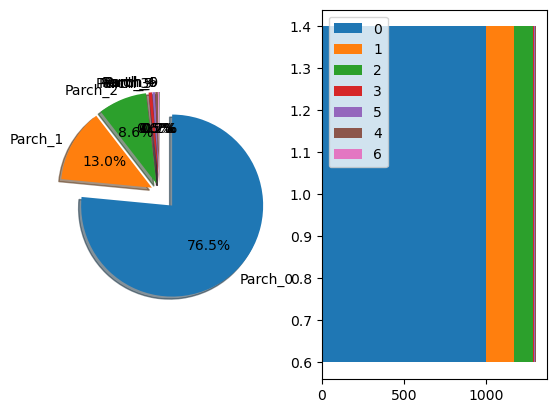

In [29]:
sorted_counts = df.Parch.value_counts()
ordered_labels = ["Parch_"+str(cls) for cls in sorted_counts.index]

# declaring exploding pie
explode = [.2]
for i in range(1, len(sorted_counts)):
    explode.append(.1)

plt.subplot(1, 2, 1)
plt.pie(sorted_counts, labels=ordered_labels, startangle=90,
        counterclock=False, explode=explode, autopct='%.1f%%', shadow = True);
plt.axis('square');

plt.subplot(1, 2, 2)
baseline = 0
for i in range(sorted_counts.shape[0]):
    if i in sorted_counts:
        plt.barh(y = 1, width = sorted_counts[i], left = baseline)
        baseline += sorted_counts[i]
plt.legend(sorted_counts.index)  # add a legend for labeling

In [30]:
dict(df.Pclass.value_counts())

{3: 709, 1: 321, 2: 277}

In [31]:
sink_pclass1 = len(df[(df["Pclass"] == 1) & (df["Survived"] == 0)])

In [32]:
survived_pclass1 = len(df[(df["Pclass"] == 1) & (df["Survived"] == 1)])

In [33]:
Pclass_1 = {"Sink":sink_pclass1, "Lived":survived_pclass1}

       Count Survived
Sink     187     Sink
Lived    134    Lived


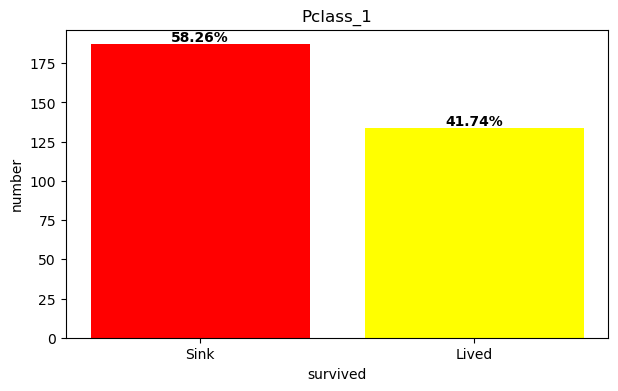

In [34]:
bar_plot(Pclass_1, "number", "survived", "Pclass_1")

In [35]:
sink_pclass2 = len(df[(df["Pclass"] == 2) & (df["Survived"] == 0)])

In [36]:
survived_pclass2 = len(df[(df["Pclass"] == 2) & (df["Survived"] == 1)])

In [37]:
Pclass_2 = {"Sink":sink_pclass2, "Lived":survived_pclass2}

       Count Survived
Sink     190     Sink
Lived     87    Lived


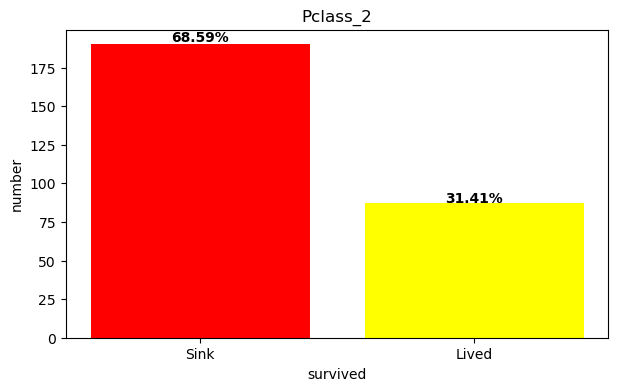

In [38]:
bar_plot(Pclass_2, "number", "survived", "Pclass_2")

In [39]:
sink_pclass3 = len(df[(df["Pclass"] == 3) & (df["Survived"] == 0)])

In [40]:
survived_pclass3 = len(df[(df["Pclass"] == 3) & (df["Survived"] == 1)])

In [41]:
Pclass_3 = {"Sink":sink_pclass3, "Lived":survived_pclass3}

       Count Survived
Sink     590     Sink
Lived    119    Lived


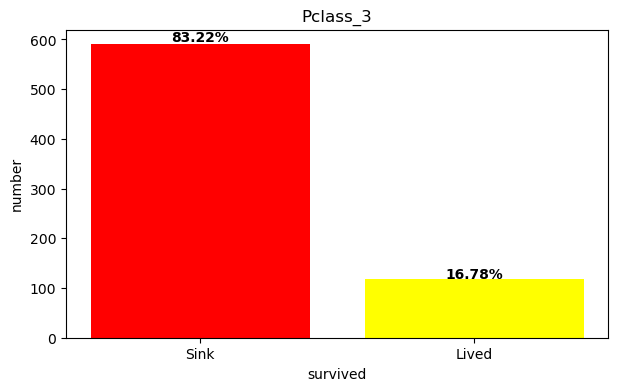

In [42]:
bar_plot(Pclass_3, "number", "survived", "Pclass_3")

In [43]:
df.Sex.value_counts()

0    843
1    464
Name: Sex, dtype: int64

In [44]:
sink_male = len(df[(df["Sex"] == 1) & (df["Survived"] == 0)])

In [45]:
survived_male = len(df[(df["Sex"] == 1) & (df["Survived"] == 1)])

In [46]:
men = {"Sink":sink_male, "Lived":survived_male}

       Count Survived
Sink     233     Sink
Lived    231    Lived


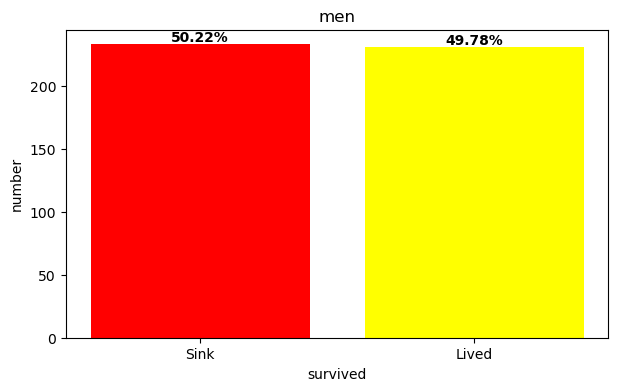

In [47]:
bar_plot(men, "number", "survived", "men")

In [48]:
sink_female = len(df[(df["Sex"] == 0) & (df["Survived"] == 0)])

In [49]:
survived_female = len(df[(df["Sex"] == 0) & (df["Survived"] == 1)])

In [50]:
women = {"Sink":sink_female, "Lived":survived_female}

       Count Survived
Sink     734     Sink
Lived    109    Lived


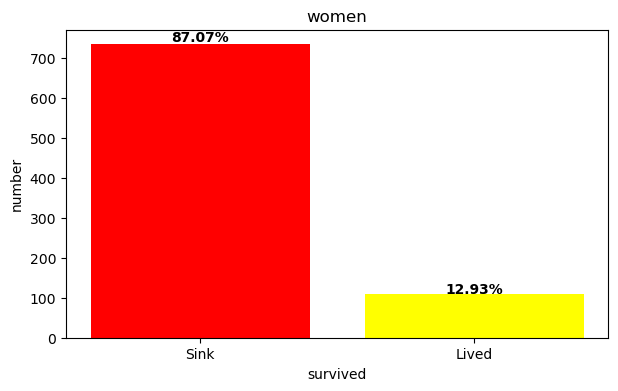

In [51]:
bar_plot(women, "number", "survived", "women")

In [52]:
thresh_fare = 70

In [53]:
sink_high_fare = len(df[(df["Fare"] >= thresh_fare) & (df["Survived"] == 0)])

In [54]:
survived_high_fare = len(df[(df["Fare"] >= thresh_fare) & (df["Survived"] == 1)])

In [55]:
high_fare = {"Sink":sink_high_fare, "Lived":survived_high_fare}

       Count Survived
Sink      80     Sink
Lived     74    Lived


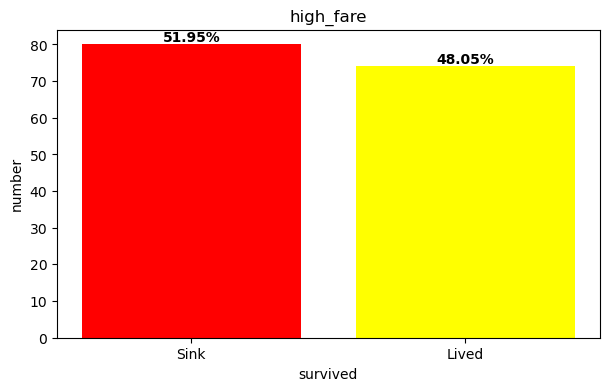

In [56]:
bar_plot(high_fare, "number", "survived", "high_fare")

In [57]:
sink_low_fare = len(df[(df["Fare"] < thresh_fare) & (df["Survived"] == 0)])

In [58]:
survived_low_fare = len(df[(df["Fare"] < thresh_fare) & (df["Survived"] == 1)])

In [59]:
low_fare = {"Sink":sink_low_fare, "Lived":survived_low_fare}

       Count Survived
Sink     887     Sink
Lived    266    Lived


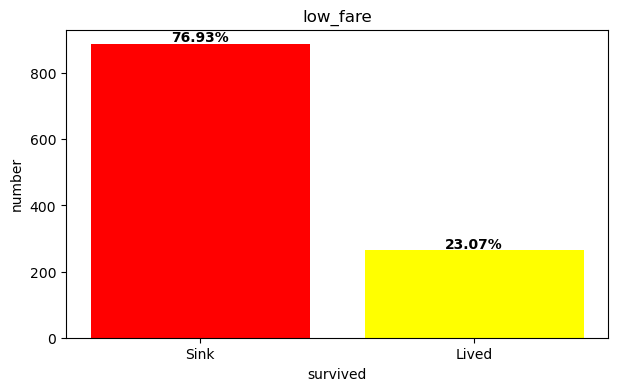

In [60]:
bar_plot(low_fare, "number", "survived", "low_fare")

In [61]:
# print(dict(df.Fare.value_counts()), len(dict(df.Fare.value_counts())))

In [62]:
# plt.hist(data = df, x="Fare")

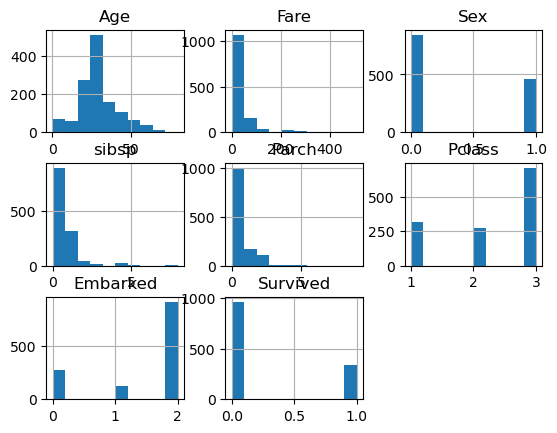

In [63]:
df.loc[:,df.columns != 'Passengerid'].hist();

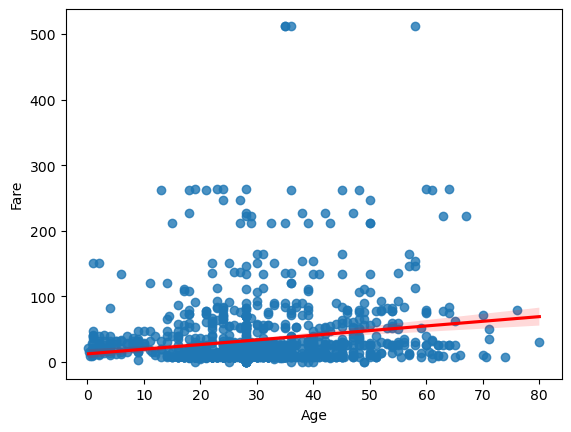

In [64]:
sbs.regplot(data = df, x=df['Age'], y=df['Fare'], line_kws={"color": "red"});

In [65]:
len(df["Fare"][(df["Fare"] > 220) & (df["Survived"] == 0)])

18

In [66]:
len(df["Fare"][(df["Fare"] > 220) & (df["Survived"] == 1)])

11

In [67]:
dict(df.sibsp.value_counts())

{0: 889, 1: 319, 2: 42, 4: 22, 3: 20, 8: 9, 5: 6}

In [68]:
len(df["sibsp"][(df["sibsp"] == 0) & (df["Survived"] == 1)])

208

In [69]:
len(df["sibsp"][(df["sibsp"] == 5) & (df["Survived"] == 1)])

0

In [70]:
df.corr()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
Passengerid,1.000000,0.025792,0.031945,-0.012297,-0.055696,0.008576,-0.039776,-0.051518,-0.331125
Age,0.025792,1.000000,0.176554,-0.057161,-0.189332,-0.125112,-0.375811,-0.065125,-0.060236
Fare,0.031945,0.176554,1.000000,0.184192,0.161141,0.222422,-0.557915,-0.239212,0.171942
Sex,-0.012297,-0.057161,0.184192,1.000000,0.110768,0.214371,-0.121826,-0.099408,0.401985
sibsp,-0.055696,-0.189332,0.161141,0.110768,1.000000,0.373383,0.059819,0.066055,-0.013174
Parch,0.008576,-0.125112,0.222422,0.214371,0.373383,1.000000,0.017304,0.045216,0.056183
Pclass,-0.039776,-0.375811,-0.557915,-0.121826,0.059819,0.017304,1.000000,0.187349,-0.241672
Embarked,-0.051518,-0.065125,-0.239212,-0.099408,0.066055,0.045216,0.187349,1.000000,-0.093225
Survived,-0.331125,-0.060236,0.171942,0.401985,-0.013174,0.056183,-0.241672,-0.093225,1.000000


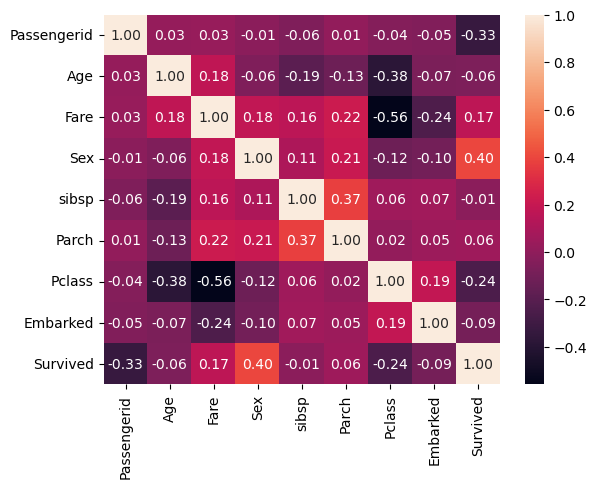

In [72]:
sbs.heatmap(data = df.corr(), annot=True, fmt='.2f')

In [73]:
correlated_df = df[['Fare', 'Sex', 'Parch', 'Survived']]

In [74]:
correlated_df.head()

,Fare,Sex,Parch,Survived
0,7.2500,0,0,0
1,71.2833,1,0,1
2,7.9250,1,0,1
3,53.1000,1,0,1
4,8.0500,0,0,0


In [75]:
correlated_df.shape

(1307, 4)